<a href="https://colab.research.google.com/github/msl93/sdsphd20_portfolio_msl/blob/main/Martin_Sundahl_Laursen_sdsphd20_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

In [3]:
!pip install -qq pyLDAvis

     |████████████████████████████████| 1.6MB 5.9MB/s 


In [4]:
#Packages
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from gensim.models import LdaMulticore
from gensim.corpora.dictionary import Dictionary

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [5]:
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')

In [6]:
data.head()

,0,1
0,I was thrilled to be back in the Great city of...,True
1,The Unsolicited Mail In Ballot Scam is a major...,True
2,"As long as I am President, I will always stand...",True
3,"Our Economy is doing great, and is ready to se...",True
4,If I do not sound like a typical Washington po...,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14736 entries, 0 to 14735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14736 non-null  object
 1   1       14736 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 244.6+ KB


Below, we are trying different pre-processing techniques and expanding the dataframe with each of the results.

In [8]:
# Pre-processing: lower case. Only nouns, pronouns, adjectives, and adverbs. Stop words.
nlp = spacy.load("en")

tokens = []
for tweet in nlp.pipe(data[0]):
  proj_tok = [token.lemma_.lower() for token in tweet if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop]
  listToStr = ' '.join([str(elem) for elem in proj_tok]) 
  tokens.append(listToStr)

In [9]:
data[2] = tokens

In [10]:
# Pre-processing: Lower case. Stop words.
nlp = spacy.load("en")

tokens = []
for tweet in nlp.pipe(data[0]):
  proj_tok = [token.lemma_.lower() for token in tweet if not token.is_stop] 
  listToStr = ' '.join([str(elem) for elem in proj_tok]) 
  tokens.append(listToStr)

In [11]:
data[3] = tokens

In [12]:
# Pre-processing: Stop words.
nlp = spacy.load("en")

tokens = []
for tweet in nlp.pipe(data[0]):
  proj_tok = [token for token in tweet if not token.is_stop] 
  listToStr = ' '.join([str(elem) for elem in proj_tok]) 
  tokens.append(listToStr)

In [13]:
data[4] = tokens

In [14]:
#We print and example
print(data[0][4])
print(data[2][4])
print(data[3][4])
print(data[4][4])

If I do not sound like a typical Washington politician, it’s because I’m NOT a politician.
typical washington politician politician
sound like typical washington politician , politician .
sound like typical Washington politician , politician .




*   Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)



We found that the best results come with no pre-processing. This makes sense as the tweets are already short, and the model would need many small details from the text to distinguish fake and real tweets.

In [15]:
# define in and outputs
X = data[0].values
y = data[1].values

In [16]:
#Examples
print(X[0:5])
print(y[0:5])

['I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST!'
 'The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it.'
 'As long as I am President, I will always stand with the HEROES of Law Enforcement!'
 'Our Economy is doing great, and is ready to set new records - best ever (Again!).'
 'If I do not sound like a typical Washington politician, it’s because I’m NOT a politician.']
[ True  True  True  True  True]


In [17]:
# Split the data in 80% trainig 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [18]:
# Selection of vectorizers
#vectorizer = CountVectorizer() #BoW
vectorizer = TfidfVectorizer() #tf-idf
X_train_vec_1 = vectorizer.fit_transform(X_train)



* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)



In [19]:
# Instantiate a model
model = LogisticRegression(max_iter=2000) #Logistic regression

In [20]:
# Train the model
model.fit(X_train_vec_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [22]:
# Check performance of the model
model.score(X_test_vec_1, y_test)

0.8171641791044776

In [23]:
# Predict on new data
y_pred = model.predict(X_test_vec_1)

In [24]:
# confusion matrix by hand... :-)
pd.crosstab(y_test, y_pred)

col_0,False,True
row_0,,
False,1189,300
True,239,1220


We get a descent performance of 81.7% on the test set.



*   Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration



In [25]:
# Heavy pre-processing as we only need terms and not 'filler words'
tokens = []
for tweet in nlp.pipe(data[0]):
  proj_tok = [token.lemma_.lower() for token in tweet if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

In [26]:
#Expand dataframe
data[5] = tokens

In [27]:
#Randomly sample 1000
random_sample = data[5].sample(n=1000)

In [28]:
# Create a Dictionary from the tweets
dictionary = Dictionary(random_sample)

In [29]:
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [30]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in random_sample]

In [31]:
# Training the model for 5 topics
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, workers = 4, passes=10)

Streaming af output blev afkortet til de sidste 5000 linjer.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [32]:
# Check out topics
lda_model.print_topics(-1)

[(0,
  '0.045*"fake" + 0.043*"news" + 0.043*"people" + 0.025*"amp" + 0.022*"good" + 0.013*"big" + 0.013*"trump" + 0.013*"country" + 0.012*"witch" + 0.012*"bad"'),
 (1,
  '0.044*"president" + 0.039*"united" + 0.036*"states" + 0.026*"great" + 0.022*"country" + 0.020*"china" + 0.018*"democrats" + 0.017*"campaign" + 0.017*"trump" + 0.015*"election"'),
 (2,
  '0.038*"democrats" + 0.030*"great" + 0.027*"radical" + 0.025*"left" + 0.024*"year" + 0.023*"amp" + 0.017*"impeachment" + 0.017*"state" + 0.016*"people" + 0.015*"%"'),
 (3,
  '0.034*"amp" + 0.033*"great" + 0.025*"big" + 0.022*"country" + 0.017*"deal" + 0.014*"china" + 0.013*"wonderful" + 0.012*"long" + 0.012*"man" + 0.012*"law"'),
 (4,
  '0.082*"great" + 0.062*"#" + 0.025*"america" + 0.024*"new" + 0.022*"maga" + 0.020*"amp" + 0.019*"trump2016" + 0.019*"job" + 0.015*"support" + 0.014*"people"')]

In [33]:
# Let's try to visualize
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [34]:
# Let's Visualize
pyLDAvis.display(lda_display)

We can try to distinguish the topics. Subjectively, I think they are about:
1: Making america great
2: Democrats
3: United states
4: Border security
5: Trump himself



*   Consider exploring using a different approach (LSI + clustering) or perhaps even CorEx



In [35]:
# We create and fit a new TfidfModel using the corpus which was pre-processed and consists of 1000 random samples
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)

In [36]:
# We now transform the whole corpus
tfidf_corpus = tfidf[corpus]

In [37]:
# We import a Latent semantic indexing model
from gensim.models.lsimodel import LsiModel

# And we fit it on the tfidf_corpus pointing to the dictionary as reference and the number of topics.
lsi = LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100)
lsi.show_topics(num_topics=5)

[(0,
  '0.319*"great" + 0.238*"amp" + 0.223*"fake" + 0.213*"news" + 0.202*"people" + 0.186*"president" + 0.177*"democrats" + 0.175*"#" + 0.157*"country" + 0.142*"big"'),
 (1,
  '0.566*"fake" + 0.515*"news" + -0.241*"great" + -0.198*"#" + 0.143*"media" + 0.134*"medium" + -0.131*"united" + -0.125*"states" + 0.125*"story" + -0.104*"border"'),
 (2,
  '0.635*"#" + -0.247*"border" + 0.231*"trump2016" + -0.211*"democrats" + 0.176*"maga" + -0.162*"radical" + -0.159*"left" + -0.155*"states" + -0.151*"united" + -0.141*"people"'),
 (3,
  '0.569*"president" + -0.317*"democrats" + 0.273*"trump" + 0.229*"united" + -0.203*"radical" + 0.202*"states" + -0.190*"left" + -0.156*"#" + 0.147*"china" + -0.142*"amp"'),
 (4,
  '-0.376*"great" + 0.352*"#" + 0.331*"democrats" + -0.309*"amp" + 0.235*"president" + 0.228*"radical" + 0.219*"left" + 0.214*"united" + 0.193*"states" + 0.155*"border"')]

In [38]:
# We can use the trained model to transform the corpus
lsi_corpus = lsi[tfidf_corpus]

In [39]:
# Load the MatrixSimilarity
from gensim.similarities import MatrixSimilarity

# Create the document-topic-matrix
document_topic_matrix = MatrixSimilarity(lsi_corpus)
document_topic_matrix_ix = document_topic_matrix.index

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [40]:
# dimensionality reduction for plotting
import umap
embeddings = umap.UMAP(n_neighbors=15, metric='cosine').fit_transform(document_topic_matrix_ix)

In [41]:
# Create clusters
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters = 5)
clusterer.fit(document_topic_matrix_ix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


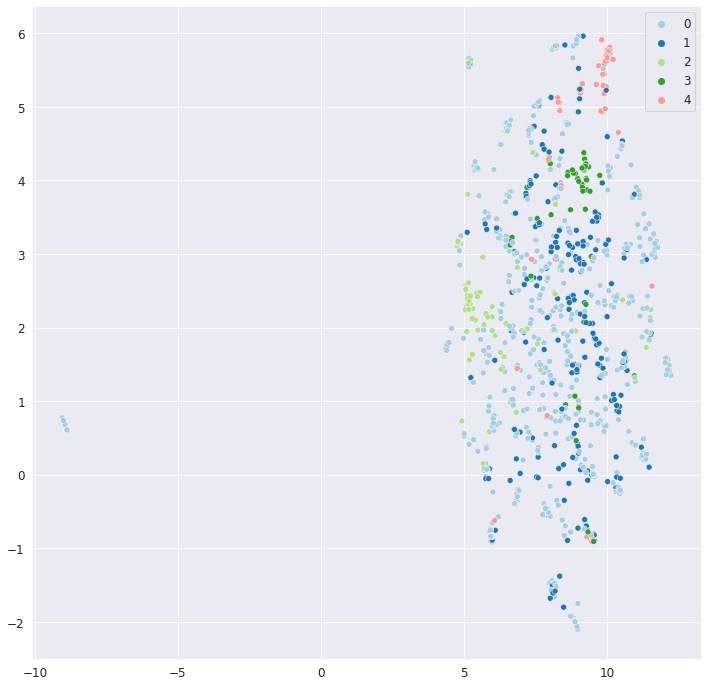

In [42]:
# Plotting
sns.set_style("darkgrid")

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,12))
g = sns.scatterplot(*embeddings.T,
                    #reduced[:,0],reduced[:,1],
                   hue=clusterer.labels_,
                    palette="Paired",
                   legend='full')

The figure shows the 5 set clusters in a 2D-cooridnate system. We will now explore them further.

In [43]:
from gensim.matutils import corpus2dense

In [44]:
# Let's check out the topics by getting "top-tfidf" for the different clusters (and we need to transponse)
tfidf_matrix = corpus2dense(tfidf_corpus, len(dictionary)).T

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [45]:
#We create dataframe with our 1000 samples
df = pd.DataFrame(data=random_sample)
df.head()

,5
10447,"[american, people, don’tcry, biased, dangerous..."
4332,"[fake, news, negatively, meeting, president, p..."
13717,"[evidence, corrupt, amp, illegal, effort, dems..."
12004,"[#, votetrump, #, makeamericagreatagain, @hill..."
1386,"[joe, biden, low, energy, candidate, like]"


In [46]:
# We reset the indexes of the dataframe
df=df.reset_index(drop=True)
df.head()

,5
0,"[american, people, don’tcry, biased, dangerous..."
1,"[fake, news, negatively, meeting, president, p..."
2,"[evidence, corrupt, amp, illegal, effort, dems..."
3,"[#, votetrump, #, makeamericagreatagain, @hill..."
4,"[joe, biden, low, energy, candidate, like]"


In [47]:
# write cluster-numbers into our data
df['cluster'] = clusterer.labels_

In [48]:
# Calculation of top words for each cluster
import numpy as np
for i in set(clusterer.labels_):
  cluster_index = df[df['cluster'] == i].index
  topk = np.flip(np.argsort(np.sum(tfidf_matrix[cluster_index,:], axis=0)))[:10]

  print(str(i) + str([dictionary[x] for x in topk]))

0['democrats', 'people', 'president', 'border', 'trump', 'year', 'deal', 'bad', 'big', 'campaign']
1['great', 'amp', 'country', 'job', 'america', 'big', 'state', 'military', 'people', 'good']
2['fake', 'news', 'medium', 'media', 'story', 'amp', 'poll', '%', 'president', 'party']
3['united', 'states', 'president', 'border', 'nations', 'china', 'america', 'large', 'people', 'proud']
4['#', 'trump2016', 'maga', 'makeamericagreatagain', 'carolina', 'great', 'day', '🇸', 'convention', 'https://']


These are the top 10 words for each of the 5 clusters. We get approximately the same as the LDA model gave us.